In [1]:
from imports import *
print('cuda' if torch.cuda.is_available() else 'cpu')

cuda


PSNR: 15.976004600524902 


Noisy             |        Clean


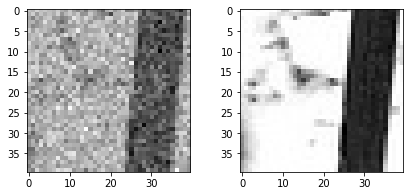

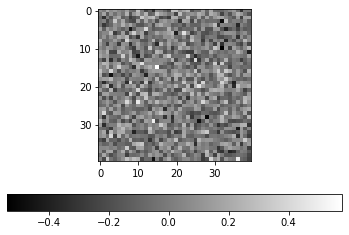

In [2]:
%matplotlib inline

sigma = 40
test_set = FlickrSet(mode='test', sigma=sigma, image_size=(40,40))

# sample clean test image
test_img = test_set[1]

# print("Norm difference:", torch.norm(test_img[0] - test_img[1]).item())
print("PSNR:", 10*torch.log10(len(test_img[0].reshape(-1)) / torch.norm(test_img[0]-test_img[1])**2).item(), '\n\n')
print("Noisy             |        Clean")
show_multiple([test_img[0], test_img[1]])

fig, ax = plt.subplots()
im = ax.imshow(test_img[2], cmap='gray')
fig.colorbar(im, orientation='horizontal')
plt.show()

In [3]:
network_type = 'DnCNN'
denoiser = Denoiser(net=DnCNN(17), 
                    experiment_name='exp_' + str(sigma), 
                    data=True,
                    sigma=sigma,
                    batch_size=20)

<IPython.core.display.Javascript object>


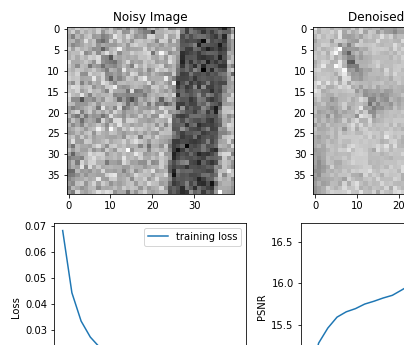

Start/Continue training from epoch 20
Finish training for 20 epochs


<IPython.core.display.Javascript object>

In [4]:
%matplotlib notebook

#train network 

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7,6))

denoiser.run(num_epochs=20, fig=fig, axes=axes, noisy_img=test_img[0])

In [9]:
# evaluate performance on test set

denoiser.evaluate()

{'loss': 0.003990810154937208, 'psnr': tensor(17.5547, device='cuda:0')}